In [6]:
# I will use Pandas for data wrangling and data manipulation
# I will use NumPy for numerical computation
# Replacing Null values (Region, Publisher)
# Standardizing categorical values(Country)
# Renaming some columns

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the file
df=pd.read_csv('C:/Users/Slayer/Documents/Python Project/VideoGamesProject/RawData/VideoGamesSales.csv')

#Checking for duplicates
#df=df[df.duplicated()]
#df.shape[0]

# Remvoing duplicates
df = df.drop_duplicates()
df['Region'] = df['Region'].fillna('North')
df['Publisher'] = df['Publisher'].fillna('Universal')

# Checking if NULL values in Region are gone
#df = df[df['Region'].isnull()]
#df.shape[0]

#Replacing $ sign from some data entries under NA_Sales
df['NA_Sales'] = df['NA_Sales'].replace('[$]', '', regex=True)

# Making data clean by all replacing USA with United States and case sensitive
df['Country'] = df['Country'].replace({'USA': 'United States'})
df['Country'] = df['Country'].str.title()

# Renaming some columns
df = df.rename(columns={'NA_Sales': 'National Sales', 'Global_Sales': 'Global Sales', 'NA_Profit': 'National Profit', 'Global_Profit': 'Global Profit'})
df

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


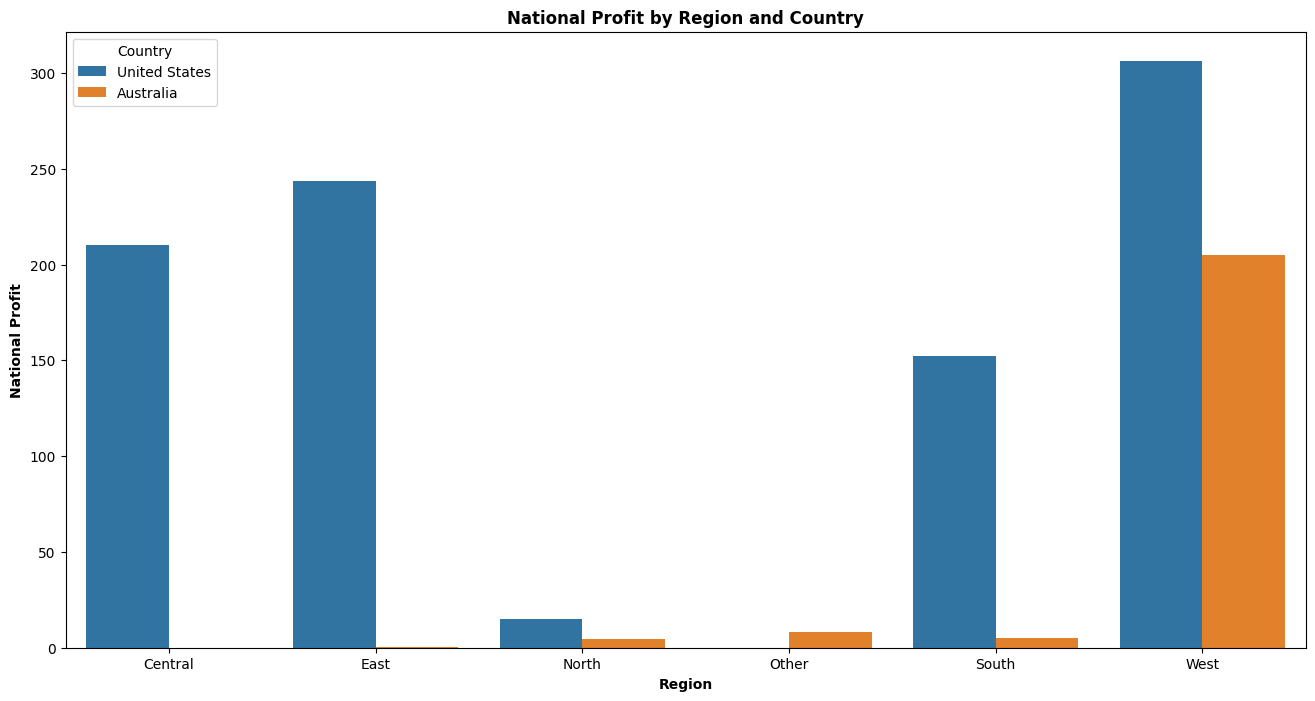

In [56]:
# Create a bar chart

National_Profit = df.groupby(['Region', 'Country'])['National Profit'].sum().reset_index()
National_Profit

plt.figure(figsize=(16, 8))
sns.barplot(data=National_Profit, x='Region', y='National Profit', hue='Country')
plt.title('National Profit by Region and Country', fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('National Profit', fontweight='bold')
plt.show()

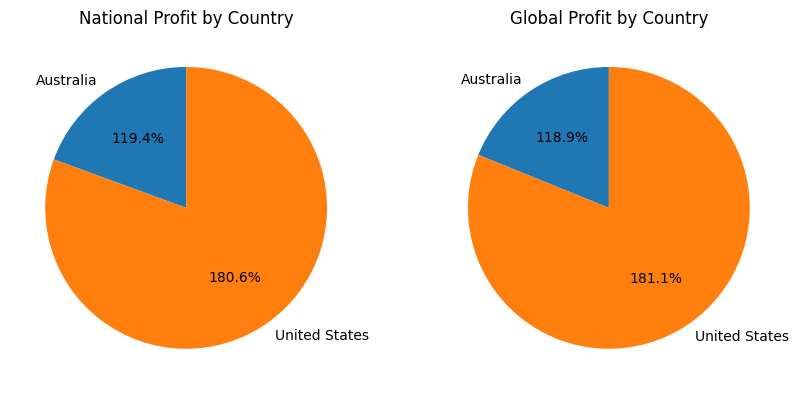

In [75]:
# Create a pie chart

Sales = df.groupby(['Country'])[['National Profit','Global Profit']].sum().reset_index()
Country=Sales['Country']
National_Profit=Sales['National Profit']
Global_Profit=Sales['Global Profit']

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(National_Profit, labels=Country, autopct='1%.1f%%', startangle=90)
axs[0].set_title('National Profit by Country')

axs[1].pie(Global_Profit, labels=Country, autopct='1%.1f%%', startangle=90)
axs[1].set_title('Global Profit by Country')

plt.show()

     